Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

file = "/fraudTrain.csv"
dat = pd.read_csv(path + file)

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


View Data

In [9]:
dat.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
dat.shape

(1296674, 23)

In [10]:
dat.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [3]:
dat = dat.drop('Unnamed: 0', axis = 1)

In [34]:
dat.shape

(1296675, 22)

Split into Training and Validation

In [4]:
n_cc = dat["cc_num"].nunique()
print("Numer of unique cc #s: " + str(n_cc))

Numer of unique cc #s: 983


In [5]:
# Randomly sample cc #s for validation
np.random.seed(42)  # set seed
unique_cc = dat["cc_num"].unique()
cc_val = np.random.choice(unique_cc, size = int(0.3 * n_cc))

In [6]:
# Split data
dat_val = dat[dat["cc_num"].isin(cc_val)]
dat_tr = dat[~dat["cc_num"].isin(cc_val)]

In [38]:
print("Shape of validation set: " + str(dat_val.shape))
print("Shape of training set: " + str(dat_tr.shape))

Shape of validation set: (319622, 22)
Shape of training set: (977053, 22)


In [8]:
# Check proportion in validation
dat_val.shape[0] / dat.shape[0]

0.2464935315325737

In [15]:
fraud_counts_tr = dat_tr['is_fraud'].value_counts()
fraud_counts_val = dat_val['is_fraud'].value_counts()

print("Training fraud counts:")
print(fraud_counts_tr)
print("\n")
print("Validation fraud counts:")
print(fraud_counts_val)

Training fraud counts:
0    971432
1      5621
Name: is_fraud, dtype: int64


Validation fraud counts:
0    317737
1      1885
Name: is_fraud, dtype: int64


In [20]:
print("Proportion of training data that are fraud: " + str(round(fraud_counts_tr[1]/fraud_counts_tr[0], ndigits = 4)))
print("Proportion of validation data that are fraud: " + str(round(fraud_counts_val[1]/fraud_counts_val[0], ndigits = 4)))

Proportion of training data that are fraud: 0.0058
Proportion of validation data that are fraud: 0.0059


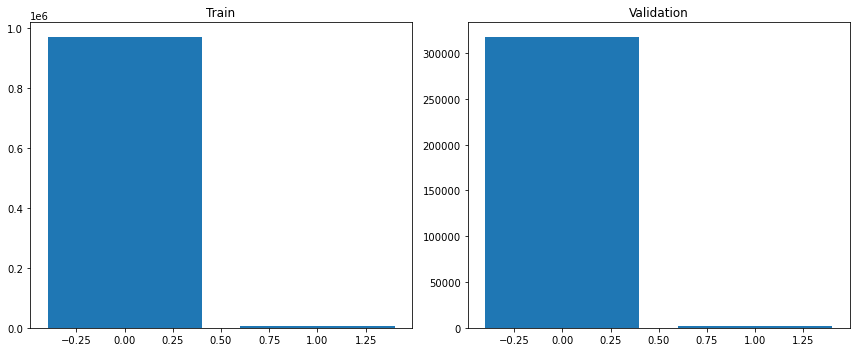

In [ ]:
# Check distribution of target in training and validation
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Two plots side by side

axs[0].bar(fraud_counts_tr.index, fraud_counts_tr.values)
axs[0].set_title('Train')

axs[1].bar(fraud_counts_val.index, fraud_counts_val.values)
axs[1].set_title('Validation')

plt.tight_layout()
plt.show()

# EDA